In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pickle

name = "/content/drive/MyDrive/BTP/Datasets/Severson/batch1.pkl"
with open(name, "rb") as f:
  try:
    data = pickle.load(f)
  except Exception:
    raise Exception("Unable to load the dataset, please check for necessary permissions.")

In [3]:
data.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9', 'b1c10', 'b1c11', 'b1c12', 'b1c13', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c22', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

In [4]:
cell0 = data['b1c0']

In [5]:
cell0.keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

In [6]:
cell0['charge_policy']

'3'

I did not get what this meant because the supplementary figure 2 explained somthing else: https://static-content.springer.com/esm/art%3A10.1038%2Fs41560-019-0356-8/MediaObjects/41560_2019_356_MOESM1_ESM.pdf (page 4)

In [7]:
cell0['cycle_life']

1190.0

High cycle life, we can plot the distribution of cycle life. (Plotting cycle life on a line for all the cells and lets see if a pattern comes up)

In [8]:
summary = cell0['summary']

In [9]:
summary.keys()

dict_keys(['IR', 'QCharge', 'QDischarge', 'Tavg', 'Tmax', 'Tmin', 'chargetime', 'cycle'])

In [10]:
def check_length(a, b):
  return len(summary[a]) == len(summary[b])

try:
  print(all([check_length(x,y) for x in summary.keys() for y in summary.keys()]))
  print(len(summary['IR']))
except Exception:
  print(False)

True
1189


Same length - Each summary level data have information about 1189 (cycle life - 1) cycles starting from 1 till 1189.

These summaries were created by the people at MIT according to their own findings and needs. Thinking from the first principles perspective, we should evaluate the what was truly collected from the machines and see how we can make use of that information to predict things.

In [11]:
cycles = cell0['cycles']

In [12]:
cycles.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [13]:
print(len(cycles) + 1 == cell0['cycle_life'])

True


In [14]:
cycle0 = cycles['1']
cycle0.keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'discharge_dQdV', 't'])

I - Current \\
Qc - ? \\
Qd - ? \\
Qdlin -  \\
T - Temperature \\
Tdlin - \\
V - Voltage \\
discharge_dQdV - \\
t - Time

In [15]:
time = cycle0['t']
current = cycle0['I']
Qc = cycle0['Qc']
Qd = cycle0['Qd']
Qdlin = cycle0['Qdlin']

In [16]:
import matplotlib.pyplot as plt

def plot_scatter(X, Y, xlabel, ylabel, figsize=(16,6)):
  plt.figure(figsize=figsize)
  plt.scatter(X, Y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

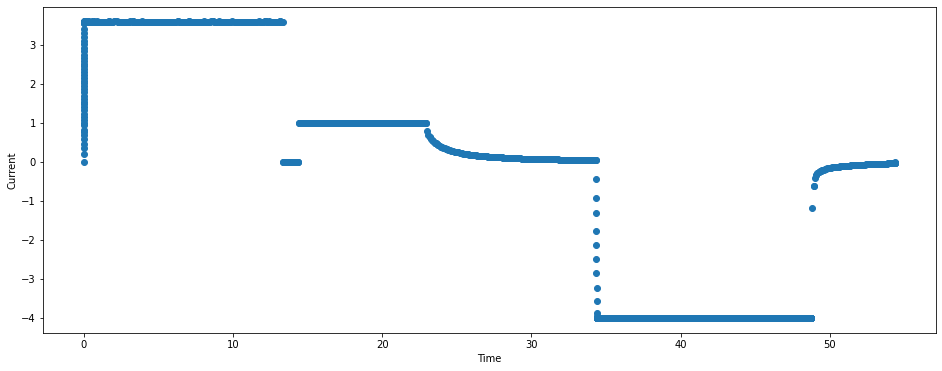

In [17]:
plot_scatter(time, current, 'Time', 'Current')

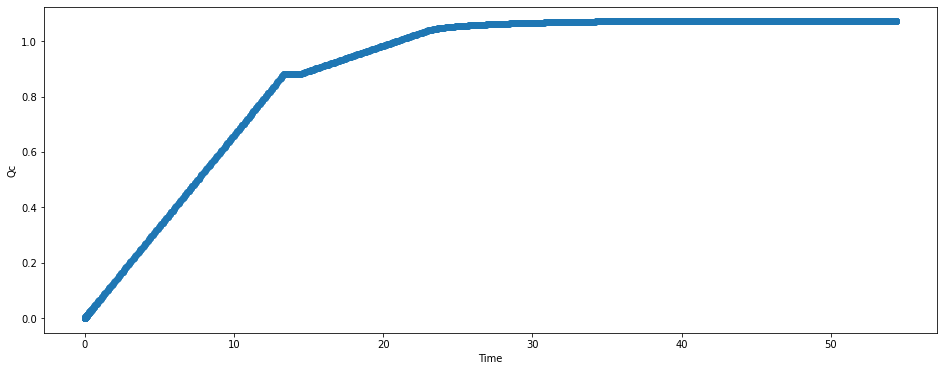

In [18]:
plot_scatter(time, Qc, 'Time', 'Qc')

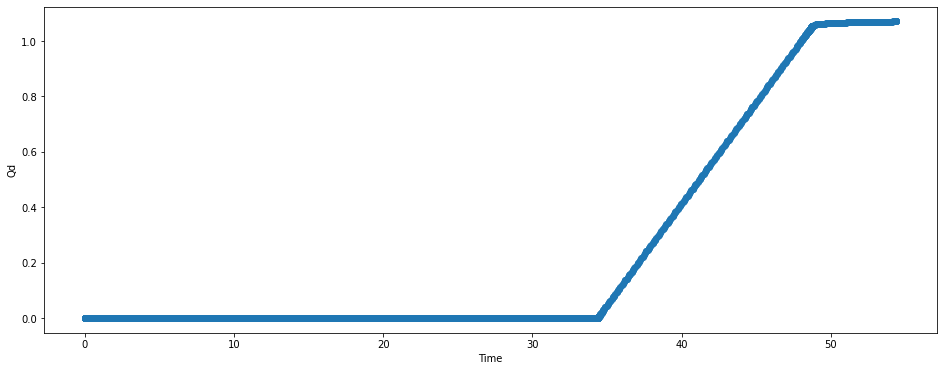

In [19]:
plot_scatter(time, Qd, 'Time', 'Qd')

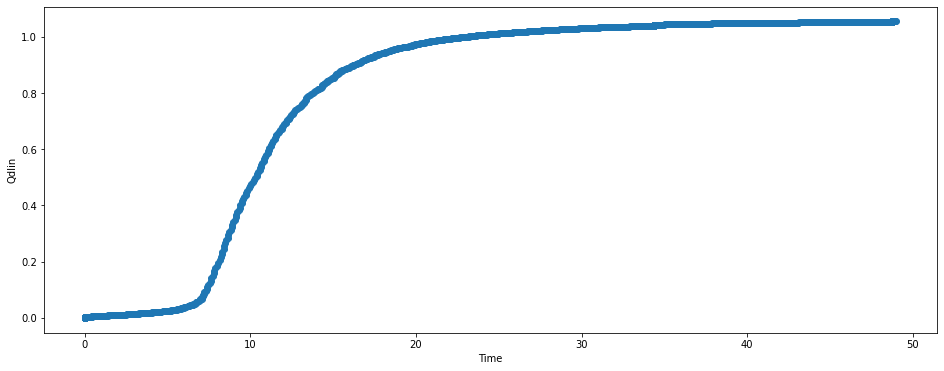

In [20]:
plot_scatter(time[:1000], Qdlin, 'Time', 'Qdlin')

- What is the unit of time here?
- What is `Qc`, `Qd`, `Qdlin`.

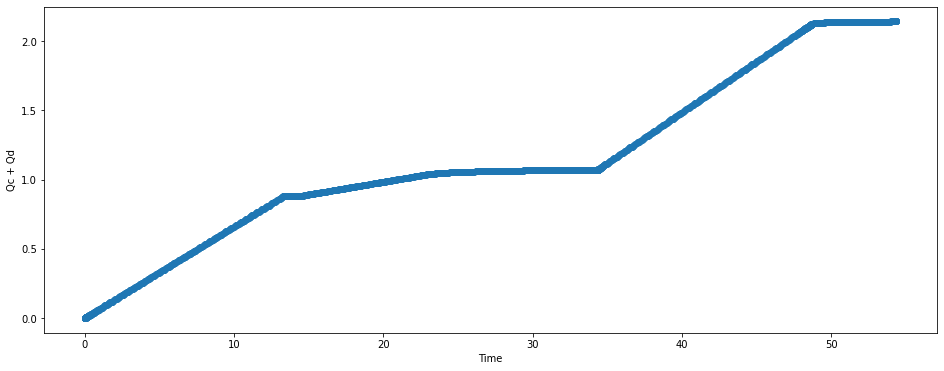

In [21]:
current_calc = [(Qc[i] + Qd[i]) for i in range(len(Qc))]
plot_scatter(time, current_calc, 'Time', 'Qc + Qd')

In [22]:
temperature = cycle0['T']
tdlin = cycle0['Tdlin']

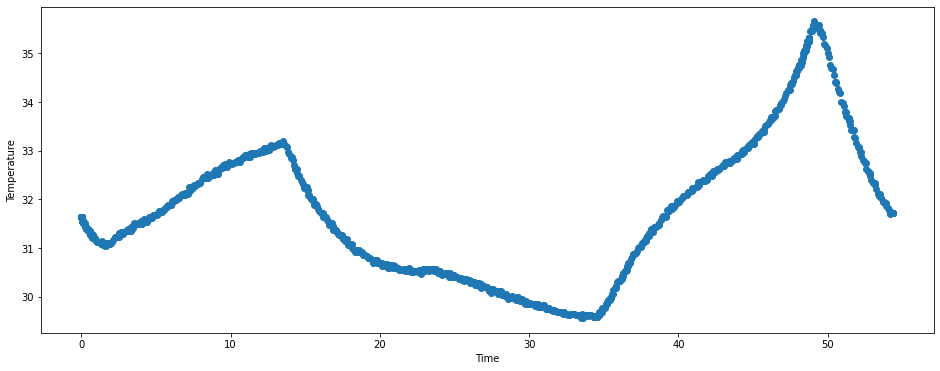

In [23]:
plot_scatter(time, temperature, 'Time', 'Temperature')

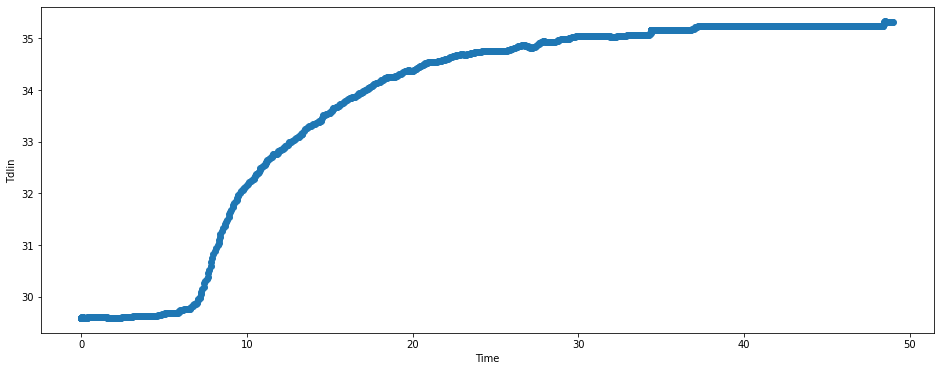

In [24]:
plot_scatter(time[:1000], tdlin, 'Time', 'Tdlin')

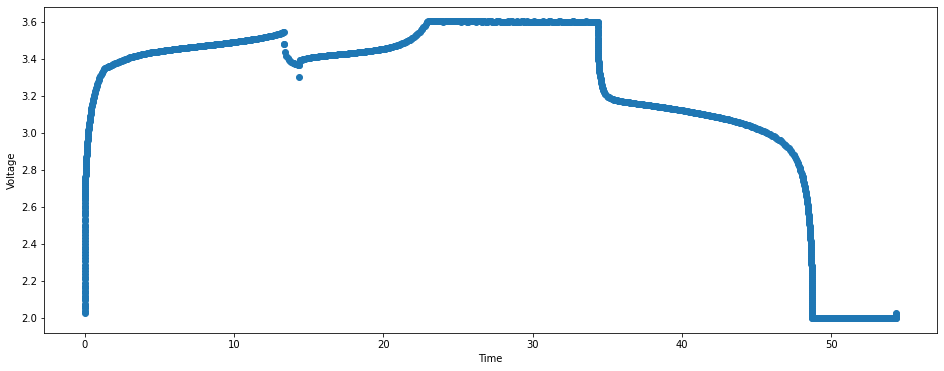

In [25]:
voltage = cycle0['V']
plot_scatter(time, voltage, 'Time', 'Voltage')

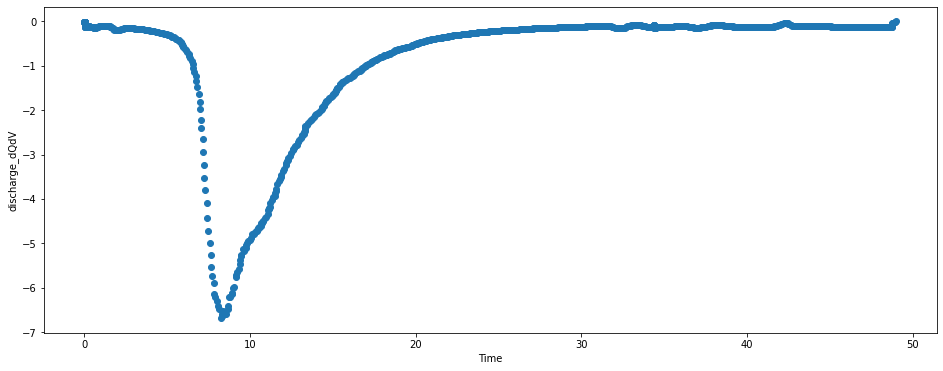

In [26]:
discharge_dQdV = cycle0['discharge_dQdV']
plot_scatter(time[:len(discharge_dQdV)], discharge_dQdV, 'Time', 'discharge_dQdV')

1. Tdlin, Qdlin, discharge_dQdV have different dimensions than other variables. Why?
2. In T, V, Qd + Qc plots - I can observe 3 phases in a complete cycle. Let us plot this and find out what's really common?

In [91]:
import numpy as np
L1 = ['Temperature', 'Voltage', 'Qc + Qd']
L2 = ['Tdlin', 'Qdlin', 'discharge_dQdV']

def getData(cycleN):
  return (
      cycleN['t'], cycleN['T'], cycleN['V'], 
      cycleN['Qc'], cycleN['Qd'], cycleN['Tdlin'], 
      cycleN['Qdlin'], cycleN['discharge_dQdV']
    )

def add_qc_qd(Qc, Qd):
  return [Qc[i] + Qd[i] for i in range(len(Qc))]

def minmax_scale(X):
  return (X - min(X)) /(max(X) - min(X))

def identity(X):
  return X


def plot_figures(x, legend, cycle_number, minmax, *y_values):
  plt.figure(figsize=(16, 4))
  scale = minmax_scale if minmax else identity
  for y in y_values:
    plt.scatter(x, scale(y))
  plt.xlabel('Time')
  plt.ylabel(f'Distribution for cycle {cycle_number}')
  plt.legend(legend)
  plt.show()

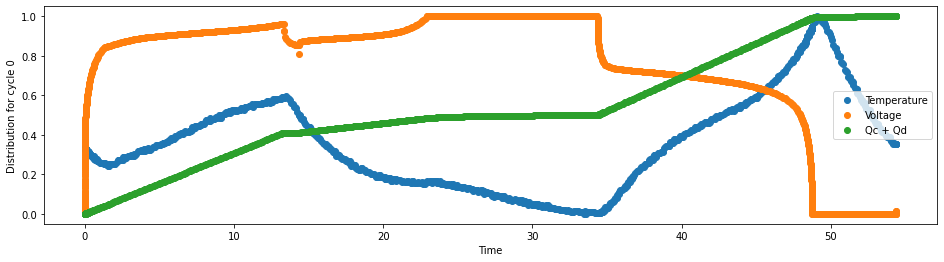

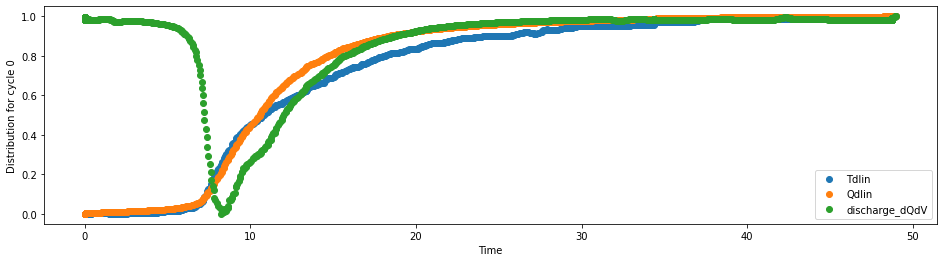

In [92]:
time, temperature, voltage, qc, qd, tdlin, qdlin, discharge_dqdv = getData(cycles['1'])
current_calc = add_qc_qd(qc, qd)
plot_figures(time, L1, 0, True, temperature, voltage, current_calc)
plot_figures(time[:1000], L2, 0, True, tdlin, qdlin, discharge_dqdv)

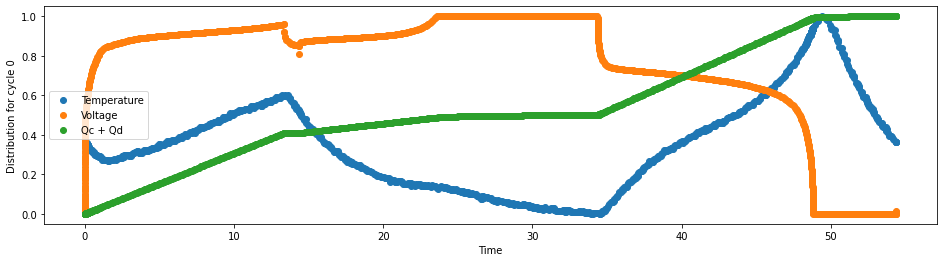

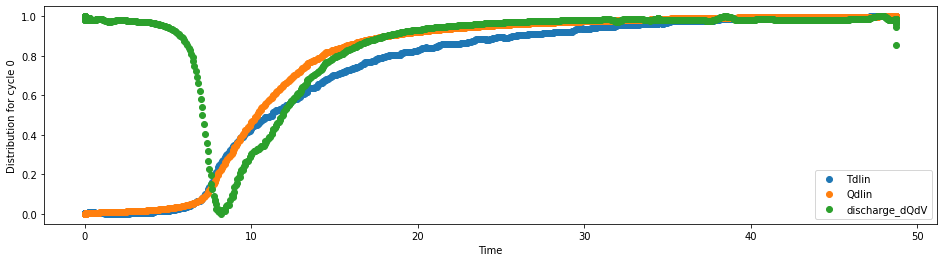

In [93]:
time, temperature, voltage, qc, qd, tdlin, qdlin, discharge_dqdv = getData(cycles['100'])
current_calc = add_qc_qd(qc, qd)
plot_figures(time, L1, 0, True, temperature, voltage, current_calc)
plot_figures(time[:1000], L2, 0, True, tdlin, qdlin, discharge_dqdv)

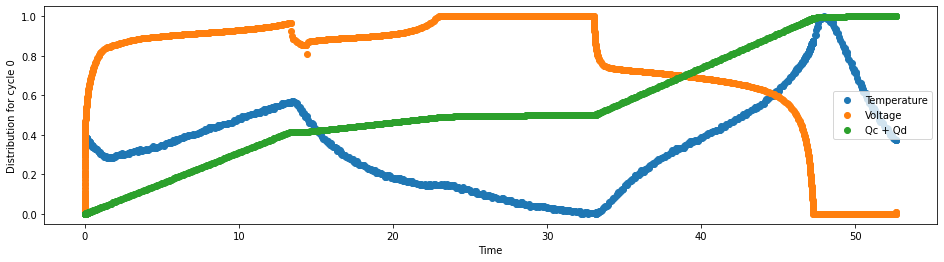

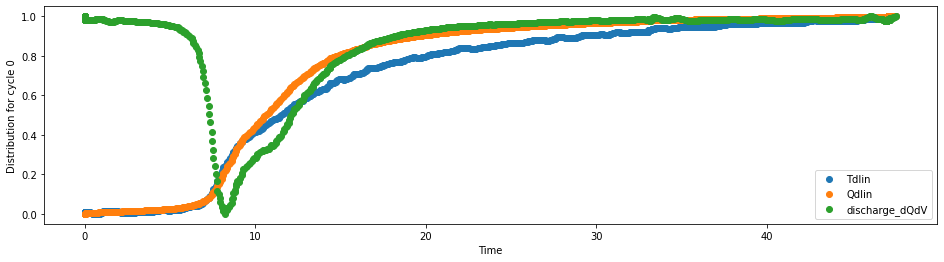

In [96]:
time, temperature, voltage, qc, qd, tdlin, qdlin, discharge_dqdv = getData(cycles['500'])
current_calc = add_qc_qd(qc, qd)
plot_figures(time, L1, 0, True, temperature, voltage, current_calc)
plot_figures(time[:1000], L2, 0, True, tdlin, qdlin, discharge_dqdv)

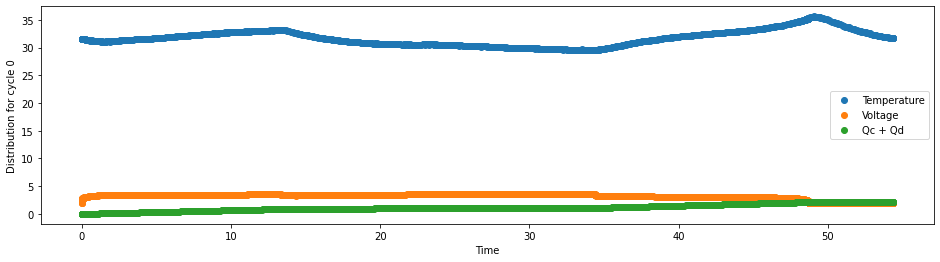

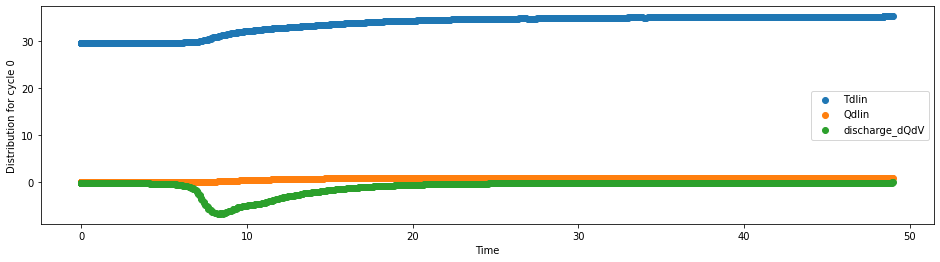

In [94]:
time, temperature, voltage, qc, qd, tdlin, qdlin, discharge_dqdv = getData(cycles['1'])
current_calc = add_qc_qd(qc, qd)
plot_figures(time, L1, 0, False, temperature, voltage, current_calc)
plot_figures(time[:1000], L2, 0, False, tdlin, qdlin, discharge_dqdv)

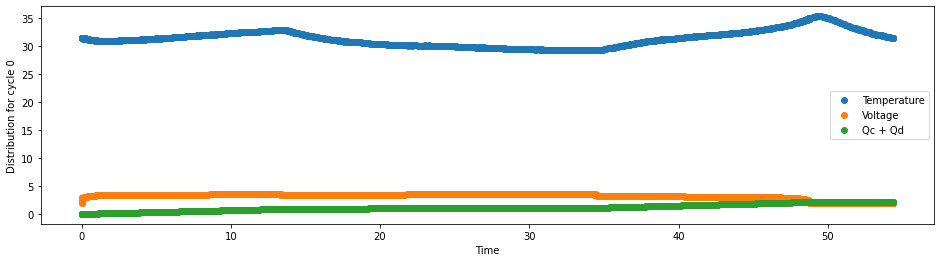

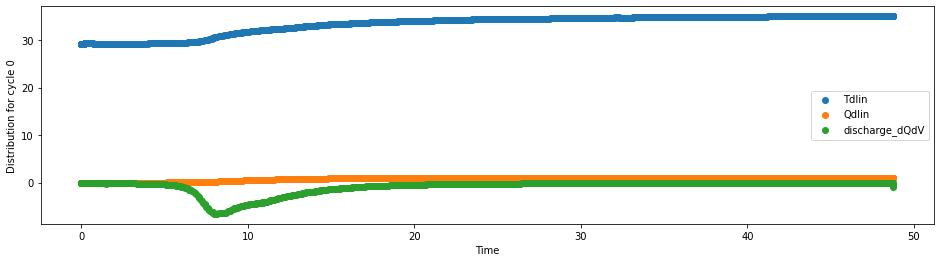

In [95]:
time, temperature, voltage, qc, qd, tdlin, qdlin, discharge_dqdv = getData(cycles['100'])
current_calc = add_qc_qd(qc, qd)
plot_figures(time, L1, 0, False, temperature, voltage, current_calc)
plot_figures(time[:1000], L2, 0, False, tdlin, qdlin, discharge_dqdv)

Now that we have some questions to ask about a single cycle. Let us first come back to the battery level data.

Let us see the ranges of cycle lifes that exists in the data.

In [30]:
cycle_lives = []
for key in data.keys():
  cycle_lives.append(data[key]['cycle_life'])

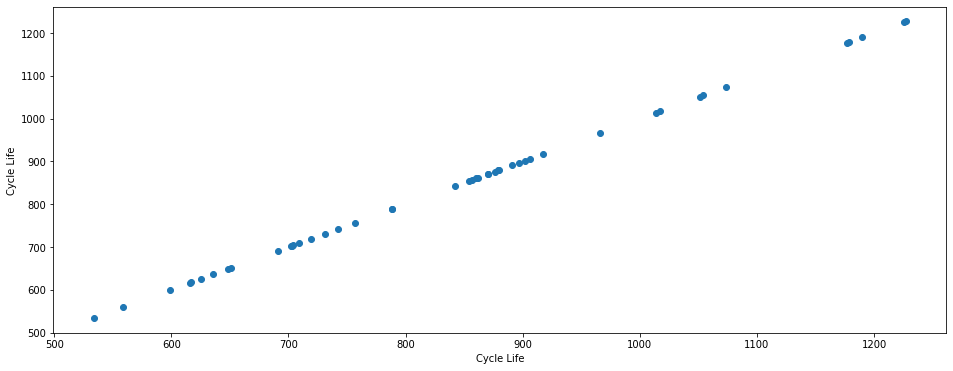

In [31]:
plot_scatter(cycle_lives, cycle_lives, 'Cycle Life', 'Cycle Life')

I understand that it will be difficult to predict exact cycle life for a cell with the limited data we have, therefore I propose the following \\
The cycle lives can be divided into several groups. We can then consider predicting the range of the cycle life for a particular cell using low number of cycles.